In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import remove_zeros, remove_before, import_file, make_bins, make_equal_bins

In [2]:
loc_b53 = import_file('Locus', '2.B53')

In [3]:
loc_b53 = remove_zeros(loc_b53)
# loc_b53 = remove_before(loc_b53, 10)
print(loc_b53.max())

Date     2024-05-31 21:18:12
Count                   54.0
dtype: object


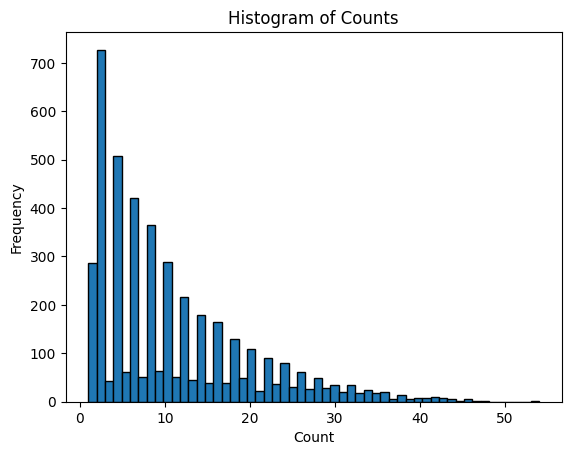

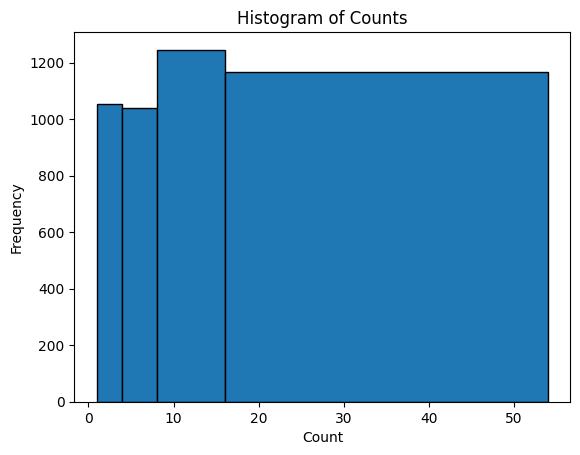

In [4]:
make_bins(loc_b53, 4, all_bins=True)
make_equal_bins(loc_b53)